In [18]:
import numpy as np
import matplotlib.pylab as plt

from wildboar.distance import matrix_profile, subsequence_match
from wildboar.datasets import load_dataset

In [81]:
x, y = load_dataset("TwoLeadECG", preprocess="normalize")
x = x[0:10].reshape(-1)
subseq = x[45:65]

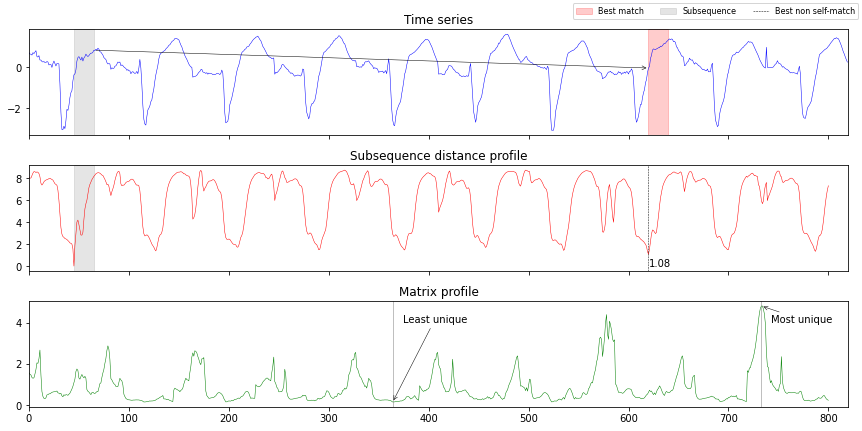

In [165]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, figsize=(12, 6), sharex=True)
ax1.plot(x, color="blue", lw=0.5)
ax1.set_xlim(0, x.size)
ax1.axvspan(45, 65, 0, 1, color="gray", alpha=0.2)
idx, dist = subsequence_match(
    subseq.reshape(1, -1), 
    x.reshape(1, -1), 
    return_distance=True, 
    threshold=np.inf, 
    metric="scaled_euclidean"
)
ax2.plot(idx, dist, color="red", lw=0.5)
ax2.axvspan(45, 65, 0, 1, color="gray", alpha=0.2, label="Subsequence")

mp, mpi = matrix_profile(x, window=20, return_index=True)
ax3.plot(mp, color="green", lw=0.5)

ax1.annotate(text="", xy=(65, x[65]), xytext=(mpi[45], x[mpi[45]]), arrowprops=dict(arrowstyle='<-', lw=0.5))
ax1.axvspan(mpi[45], mpi[45]+20, 0, 1, color="red", alpha=0.2, label="Best match")
ax1.set_title("Time series")

do = np.argsort(dist)
ax2.annotate(text="%.2f" % dist[do[1]], xy=(do[1], x[do[1]]))
ax2.axvline(do[1], 0, 1, color="black", lw=0.5, ls="--", label="Best non self-match")
ax2.set_title("Subsequence distance profile")
lu = np.argmin(mp)
mu = np.argmax(mp)
ax3.axvline(lu, 0, 1, color="gray", lw=0.5)
ax3.annotate(text="Least unique", xy=(lu, mp[lu]), xytext=(lu + 10, 4), arrowprops=dict(arrowstyle='->', lw=0.5))
ax3.axvline(mu, 0, 1, color="gray", lw=0.5)
ax3.annotate(text="Most unique", xy=(mu, mp[mu]), xytext=(mu + 10, 4), arrowprops=dict(arrowstyle='->', lw=0.5))
ax3.set_title("Matrix profile")
fig.tight_layout()
fig.legend(ncol=4, fontsize=8)

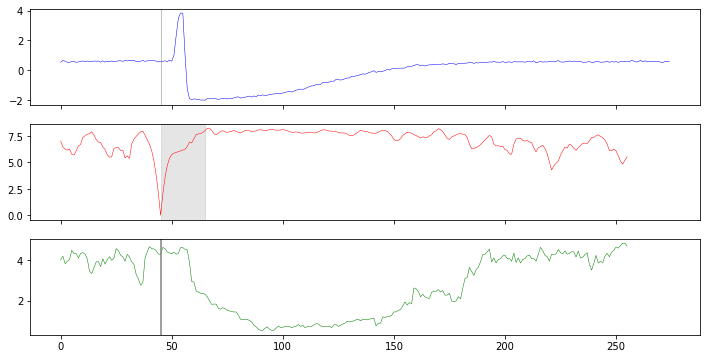

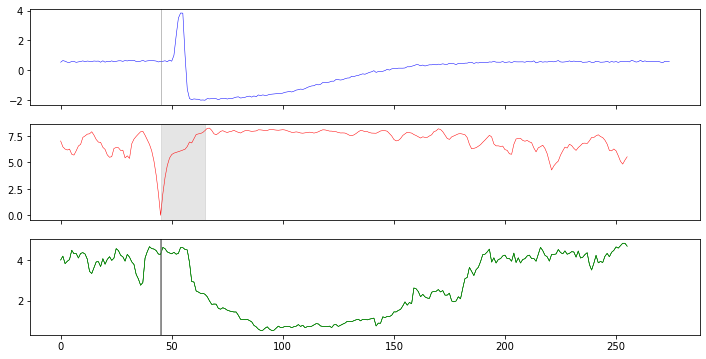

In [66]:

fig